<a href="https://colab.research.google.com/github/pushkal1234/Fraud-detection/blob/main/INSAID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FRAUD Detection Module using Random Forest Classifier**
 
Step 1: Start with Importing using libraries for data Preprocessing , Data Wrangling and Statistical Visualization

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

Due to large size dataset of 63,62,620 rows and 11 columns we can't load it directly to google colab notebook hence load it to google drive and mount drive here.

In [43]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [44]:
from google.colab import files
files.upload()

{}

**Analysing our Dataset**

Check first 10 rows and we now analyse them to get insight of different columns of dataset taken into consideration

In [2]:
data = pd.read_csv("/content/gdrive/MyDrive/project/Fraud.csv")
print(data.head(10))
print(data.shape)

   step      type    amount  ... newbalanceDest  isFraud  isFlaggedFraud
0     1   PAYMENT   9839.64  ...           0.00        0               0
1     1   PAYMENT   1864.28  ...           0.00        0               0
2     1  TRANSFER    181.00  ...           0.00        1               0
3     1  CASH_OUT    181.00  ...           0.00        1               0
4     1   PAYMENT  11668.14  ...           0.00        0               0
5     1   PAYMENT   7817.71  ...           0.00        0               0
6     1   PAYMENT   7107.77  ...           0.00        0               0
7     1   PAYMENT   7861.64  ...           0.00        0               0
8     1   PAYMENT   4024.36  ...           0.00        0               0
9     1     DEBIT   5337.77  ...       40348.79        0               0

[10 rows x 11 columns]
(6362620, 11)


For Column named "Type" we will convert the categorical values into integer type by using get_dummies function in pandas dataframe and drop one column out of 5
Here 00001 defines that **Type = TRANSFER**
similarly 10000 defines **Type = CASH_IN**
This function allows us to convert the categorical values into 5 variable binary into form

In [3]:
type_dummy = pd.get_dummies(data['type'], drop_first=True)
type_dummy

,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,1,0
1,0,0,1,0
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
6362615,1,0,0,0
6362616,0,0,0,1
6362617,1,0,0,0
6362618,0,0,0,1


**Column Concatination** 

In [4]:
data = pd.concat([data, type_dummy], axis = 1)
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0,0,0,1,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0,0,0,1,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0,0,0,1,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0,0,0,1,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0,0,0,1,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0,0,1,0,0


We now remove irrelevant columns as **Type** can now be removed because it had being converted into 4 different binary columns and we can drop the columns such as **nameOrig** and **nameDest** as they contains the string value which won't be able to passed during Random Forest Classifier model training.

In [5]:
data.drop('type', axis=1, inplace = True)

In [6]:
data.drop(['nameOrig','nameDest'],axis=1, inplace=True)

Step 2: **Data Wrangling**

Now we check out the number of columns left 

In [7]:
data.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'CASH_OUT', 'DEBIT',
       'PAYMENT', 'TRANSFER'],
      dtype='object')

Visulize out dataframe again

In [8]:
data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


Step 3: **Statistical Visualization**

Draw  Histogram Plots for all columns to give statistical Visualization of our data


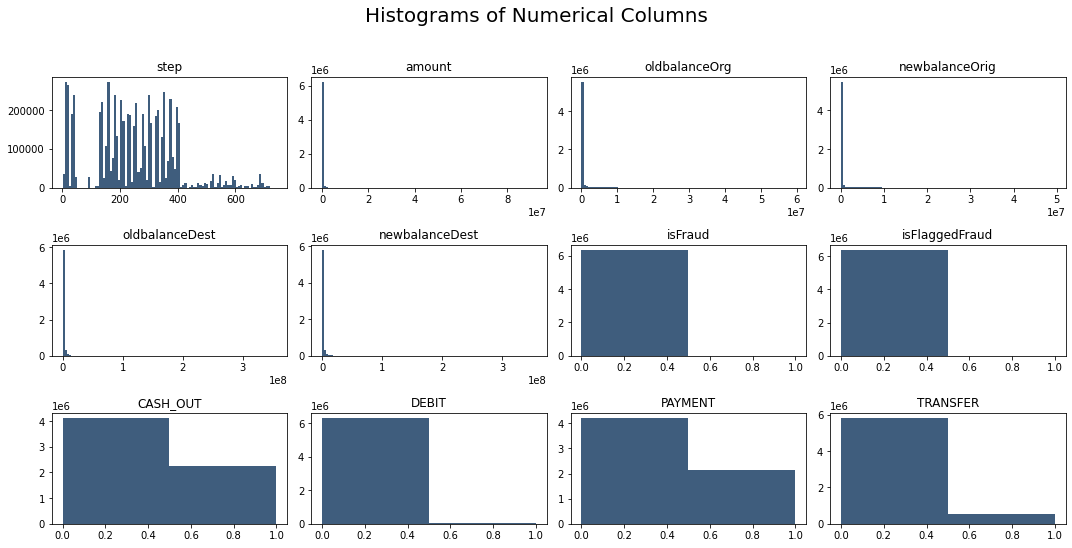

In [31]:
fig = plt.figure(figsize=(15,20))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(data.shape[1]):
    plt.subplot(8, 4, i + 1)
    f = plt.gca()
    f.set_title(data.columns.values[i])

    vals = np.size(data.iloc[:, i].unique())
    if vals >= 100:
        vals = 100                                    # limit our bins to 100 maximum
    
    plt.hist(data.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Check out all the Null entries in our data and remove them all using **dropna()** function. 

In [35]:
data.isnull().sum()

step              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
CASH_OUT          0
DEBIT             0
PAYMENT           0
TRANSFER          0
dtype: int64

Gives us the number of fraud transactions in per 100,000 transactions

In [32]:
print('Number of fraudulent transactions = %d or %d per 100,000 transactions in the dataset'
      %(len(data[data.isFraud==1]), len(data[data.isFraud==1])/len(data)*100000))

Number of fraudulent transactions = 8213 or 129 per 100,000 transactions in the dataset


Histogram visualization of Fraud Transactions on the basis of different factors

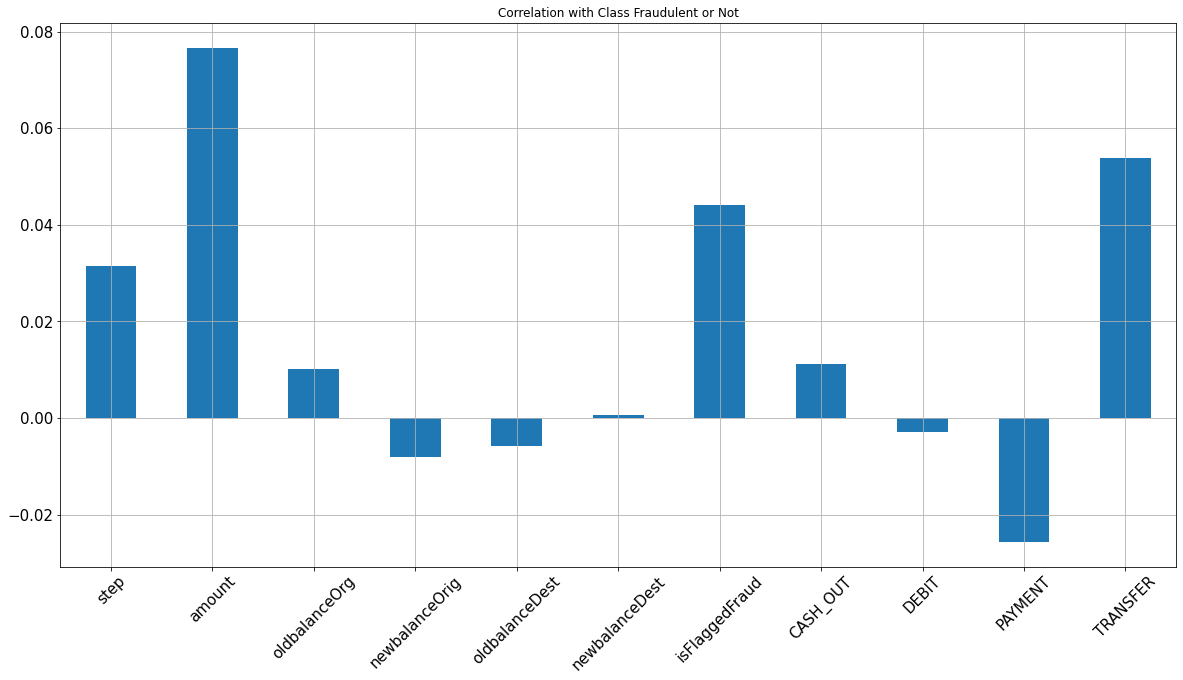

In [34]:
data2 = data.drop(columns = ['isFraud'])   # drop non numerical columns
data2.corrwith(data.isFraud).plot.bar(
        figsize = (20, 10), title = "Correlation with Class Fraudulent or Not", fontsize = 15,
        rot = 45, grid = True)
plt.show()

Check out the duplicated rows within the data

In [36]:
data.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
6362615    False
6362616    False
6362617    False
6362618    False
6362619    False
Length: 6362620, dtype: bool

Check out the data type of various columns in our dataset as this is useful step to convert the categorical data type into int or float as required durig training our model

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         int64  
 7   isFlaggedFraud  int64  
 8   CASH_OUT        uint8  
 9   DEBIT           uint8  
 10  PAYMENT         uint8  
 11  TRANSFER        uint8  
dtypes: float64(5), int64(3), uint8(4)
memory usage: 412.6 MB


Now we calculate mean, std etc to get statistical Analysis of our data.

In [12]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06,3.516633e-01,6.511783e-03,3.381461e-01,8.375622e-02
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03,4.774895e-01,8.043246e-02,4.730786e-01,2.770219e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


**Statistical Visualization :**

Below figure gives us an insight regarding number of Fraudlent and Non Fraud cases on the basis of Amount and gives the representation as dark colour if amount is greater than 8000 INR.

**Insights from the Data:**

Number of Fraud cases reported from the Dataset as provided is 8213 and most of them reported are less than 2000 INR
Number of Non Fraud cases are: 6354407 

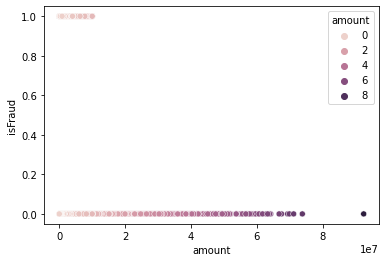

In [ ]:
sns.scatterplot(x='amount', y='isFraud', data=data, color= 'r', hue='amount')

In [ ]:
data['isFlaggedFraud'].describe()

count    6.362620e+06
mean     2.514687e-06
std      1.585775e-03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: isFlaggedFraud, dtype: float64

Number of flagged fraud cases are very less and most of them are at a range of below 2000

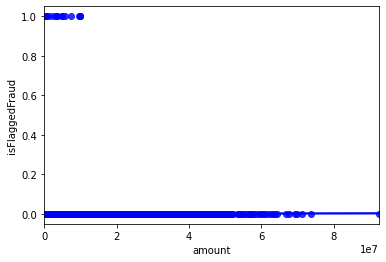

In [ ]:
sns.regplot(x='amount', y='isFlaggedFraud', data=data, color='b')

Count Number of Fraud cases and Flagged Fraud cases

0 represent not Fraud

1 represent is Fraud

In [13]:
data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [14]:
data['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

Before training our model we should have a last view of our dataframe to check the entries, columns 

In [9]:
data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


Dividing data frame into X and Y and convert into a numpy array as it would be eassy for training our model
Here X has all columns except **isFraud** and Y has only one column that is **isFraud**

In [10]:
# dividing the X and the Y from the dataset
X = data.drop('isFraud', axis=1)
Y = data["isFraud"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing 
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

(6362620, 11)
(6362620,)


In [13]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)
print(xTrain.shape)
print(xTest.shape)

(5090096, 11)
(1272524, 11)


Spliting our data into train and  test

Training our data using **Random Forest Classifier**

In [14]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
# predictions
yPred = rfc.predict(xTest)

This is our Predicted output using the RFC algorithm as applied above having **1272524 rows**

In [45]:
print(yPred)
print(yPred.shape)

[0 0 0 ... 0 0 0]
(1272524,)


Calculation of **Accuracy, Precision, Recall, Confusion Matrix**

In [41]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix, plot_roc_curve
  
n_outliers = len(data["isFraud"])
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")
  
acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))
  
prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))
  
rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))
  
f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))
  
MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))


The model used is Random Forest classifier
The accuracy is 0.9997225985521687
The precision is 0.9802880970432145
The recall is 0.7981481481481482
The F1-Score is 0.879891119428377
The Matthews correlation coefficient is0.8844149293866974


In [38]:
results_testset = pd.DataFrame([['RandomForest', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999723,0.201852,0.798148,0.980288,0.879891


Graphical view for ROC

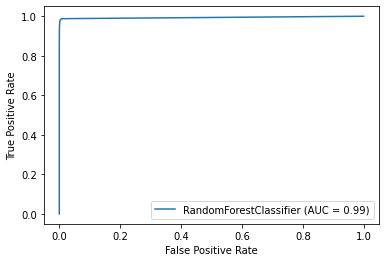

In [42]:
ROC_RF = plot_roc_curve(rfc, xTest, yTest)
plt.show()

**Accuracy**

In [21]:
rfc.score(xTest,yTest)

0.9997225985521687

Below shown Confusion matrix gives us idea about the data that we were dealing 

out of **1272524 test cases we were dealing with we get Non Fraud cases as 1270878 and while checking it via the dataset we get to know that they were NON Fraud cases**
False Positive = 26

False Negative = 327

True Negative = 1293

Here 0 is taken as Positive 
and 1 as Negative 
because we would be positive if case report is Non Fraud 

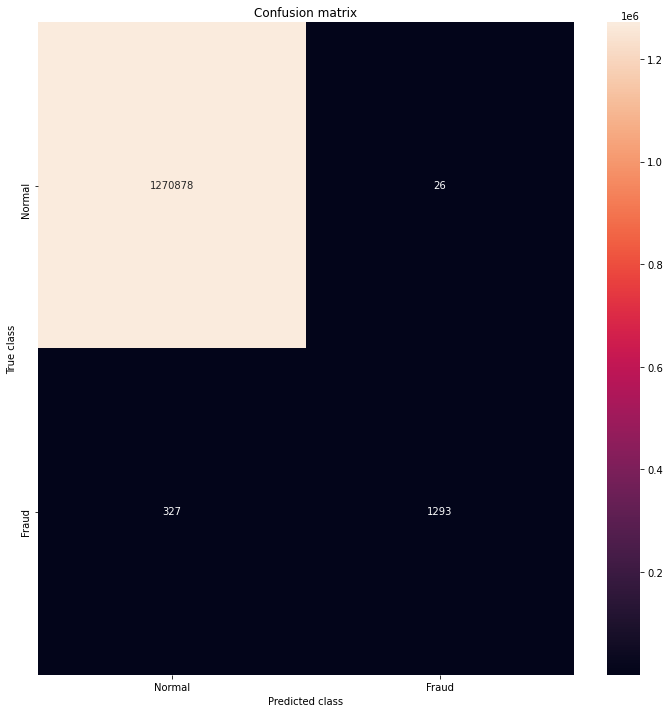

In [30]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d",color='r');
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [25]:
prediction_file = pd.Series(rfc.predict(xTest),name='submission')

Now Extracting our predicted csv file which contains values as 0 and 1 and gives us an estimation of number of Fraud cases (1) and non fraud cases (0)

In [26]:
prediction_file.to_csv('Random Forest Classifier Prediction.csv', index=False)

**Conclusion**

The Dataset Provided by the INSAID team contains 6362620 rows and 10 columns out of which 1272524 cases were tested over the algorithm and we get True Positive cases as 1270878 with an accuracy of **0.9997225985521687**
This data has a very large deviation towards one class hence we need to have accuracy more than 99% . 
The number of FRAUD cases are less than the 1% of the total data so we need to be very accurate while training our data if accuracy is less than 98% then for almost all the test data it will show a NON Fraud Case hence to enhance the accuracy of this model it has being tested over **three different algorithm** 
**Decision Tree** where we get the accuracy of 
**0.9992392589211521** and train with **Neural Network** as well with an accuracy of **0.9993796944618225**
Hence to enhance the productivity of our model we will be using **Random Forest Classifier** as specified above as it give us the maximum accuracy and moreover the sort of data we are dealing with must have high accuracy as number of data points from one class i.e class (1) are very less hence high accuracy is a major concern for us. 

so we select Random Forest Classifier with Accuracy **0.9997225**

**Candidate Expectation**

1) Various Operation Performed such as Data Wrangling, Preprocessing, visualization are mentioned above along with the code.

2) The Model take use of Random Forest Classifier where we have input in form of integer or float some of the irrelevant columns such as **'nameOrig', 'nameDest'** were removed before training model.
All Integer type variables were selected because they were relevant and contribute to the prediction model 

3) According to the Data Provided the major key factor responsible to detict the FRAUD activity were amount
as according to scatter plot visualization we know that FRAUD activities happen for amount value less than 2000.

4) Company should enhace security measure such as OTP and various Password system to prevent FRAUDLENT activity.

5) If these were implemented we can check from the data whether these activities get reduced or not as according to the data total 8213 FRAUD cases get reported and if this count gets reduced then we can get an idea that these measures were implemented by the company